In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('synthetic_data.csv')

# Inspect data
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57592 entries, 0 to 57591
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Patient ID                       57592 non-null  object
 1   Date of birth                    57592 non-null  object
 2   Gender                           57592 non-null  object
 3   Date confirmed HIV positive      57592 non-null  object
 4   Previous ART exposure            57592 non-null  object
 5   Current ART regimen              57592 non-null  object
 6   Start date of current ART        57592 non-null  object
 7   Date of first visit              57592 non-null  object
 8   Date of most recent visit        57592 non-null  object
 9   CD4 count at first visit         57592 non-null  int64 
 10  Viral load at first visit        57592 non-null  int64 
 11  CD4 count at most recent visit   57592 non-null  int64 
 12  Viral load at most recent visit 

In [2]:
import pandas as pd
import numpy as np

def calculate_risk_score(df):
    def assign_risk(row):
        # Age at First Visit
        if row['Age at first visit'] < 30:
            age_risk = 0
        elif 30 <= row['Age at first visit'] < 40:
            age_risk = 1
        elif 40 <= row['Age at first visit'] < 50:
            age_risk = 2
        elif 50 <= row['Age at first visit'] < 60:
            age_risk = 3
        elif 60 <= row['Age at first visit'] < 70:
            age_risk = 4
        else:
            age_risk = 5

        # CD4 Count at Most Recent Visit
        if row['CD4 count at most recent visit'] > 500:
            cd4_risk = 0
        elif 350 <= row['CD4 count at most recent visit'] <= 499:
            cd4_risk = 1
        elif 200 <= row['CD4 count at most recent visit'] <= 349:
            cd4_risk = 3
        else:
            cd4_risk = 5

        # Viral Load at Most Recent Visit
        if row['Viral load at most recent visit'] < 20:
            viral_load_risk = 0
        elif 20 <= row['Viral load at most recent visit'] <= 1000:
            viral_load_risk = 2
        else:
            viral_load_risk = 5

        # Adherence to ART
        adherence_risk_map = {
            'Always': 0,
            'Often': 1,
            'Sometimes': 3,
            'Rarely': 4,
            'Never': 5
        }
        adherence_risk = adherence_risk_map.get(row['Adherence to ART'], 0)

        # Comorbidities
        comorbidities_risk_map = {
            'None': 0,
            'Diabetes': 2,
            'Hypertension': 2,
            'Tuberculosis': 2,
            'Hepatitis B/C': 2,
            'Cardiovascular diseases': 2,
            'Other': 2
        }
        
        # Handle NaN values in comorbidities
        if pd.isna(row['Comorbidities']):
            comorbidities_risk = 0
        else:
            comorbidities_risk = sum([comorbidities_risk_map.get(comorbidity, 2) for comorbidity in row['Comorbidities'].split(', ')])

        if comorbidities_risk > 2:
            comorbidities_risk = 5

        # Substance Use History
        substance_use_risk_map = {
            'None': 0,
            'Alcohol': 3,
            'Tobacco': 3,
            'Illicit drugs': 5,
            'Other': 5
        }
        substance_use_risk = substance_use_risk_map.get(row['Substance use history'], 0)

        # Calculate total risk score
        total_risk_score = age_risk + cd4_risk + viral_load_risk + adherence_risk + comorbidities_risk + substance_use_risk

        return total_risk_score

    # Apply the function to each row
    df['Risk Score'] = df.apply(assign_risk, axis=1)
    return df

In [3]:
data = calculate_risk_score(data)

In [4]:
data.head()

,Patient ID,Date of birth,Gender,Date confirmed HIV positive,Previous ART exposure,Current ART regimen,Start date of current ART,Date of first visit,Date of most recent visit,CD4 count at first visit,...,Reported symptoms,Dietary habits,Physical activity,Adherence to ART,Missed doses in the last month,Adverse event,Duration of followups,Date of exit from the study,Reason for exit,Risk Score
0,bacdb318-38ed-4bf1-ac9a-104183b7faa9,1955-10-06,Male,2020-04-12,No,Regimen C,2020-12-17,2004-07-06,2019-06-19,372,...,Fever,Average,Regular,Rarely,30,Yes,5461,2022-08-04,Other,19
1,95e84dde-ab5b-468f-afa3-94d4687aa71d,1994-07-01,Female,2017-10-10,Yes,Regimen A,2019-04-16,2018-05-08,2020-03-31,1430,...,Other,Average,NaN,Sometimes,16,No,693,2020-02-19,Died,15
2,6a0f9de6-50bd-41f3-8681-72dd7b657a61,1980-01-23,Male,2008-02-09,No,Regimen C,2020-10-26,2022-05-11,2023-03-02,1315,...,NaN,Healthy,Regular,Always,7,Yes,295,2022-11-26,Lost to followups,14
3,356b799b-cb8a-4f4c-a250-441b76273150,1961-12-07,Male,2012-01-24,Yes,Regimen A,2017-08-29,2009-06-23,2021-08-04,848,...,NaN,Poor,Regular,Often,24,No,4425,2022-08-04,Transferred out,13
4,5e9c4ec5-e7ed-4ef7-b944-a27a18ad4dff,2005-01-09,Male,2023-03-22,No,Regimen C,2024-05-17,2024-03-31,2024-04-30,1031,...,Other,Average,NaN,Never,8,Yes,30,2024-04-22,Transferred out,17


In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Fill missing values where appropriate
data['Comorbidities'].fillna('None', inplace=True)

# Convert date columns to datetime format
date_columns = [
    'Date of birth', 'Date confirmed HIV positive', 'Start date of current ART',
    'Date of first visit', 'Date of most recent visit', 'Date of exit from the study'
]
for col in date_columns:
    data[col] = pd.to_datetime(data[col])

# Check data types
print("\nData types after conversion:")
print(data.dtypes)


Missing values in each column:
Patient ID                             0
Date of birth                          0
Gender                                 0
Date confirmed HIV positive            0
Previous ART exposure                  0
Current ART regimen                    0
Start date of current ART              0
Date of first visit                    0
Date of most recent visit              0
CD4 count at first visit               0
Viral load at first visit              0
CD4 count at most recent visit         0
Viral load at most recent visit        0
Age at first visit                     0
Employment status                      0
Education level                        0
Income level                           0
Marital status                         0
Substance use history              11552
Comorbidities                       8194
Reported symptoms                   9604
Dietary habits                         0
Physical activity                  19037
Adherence to ART         

In [6]:
# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(data.describe())

# Descriptive statistics for categorical columns
print("\nDescriptive statistics for categorical columns:")
print(data.describe(include=['object']))


Descriptive statistics for numerical columns:
                       Date of birth    Date confirmed HIV positive  \
count                          57592                          57592   
mean   1975-01-06 00:18:39.155438272  2008-08-31 03:28:28.737324544   
min              1943-05-26 00:00:00            1961-08-16 00:00:00   
25%              1959-04-08 18:00:00            2000-04-17 18:00:00   
50%              1975-02-13 00:00:00            2012-09-11 00:00:00   
75%              1990-10-26 00:00:00            2020-02-27 06:00:00   
max              2006-05-24 00:00:00            2024-05-24 00:00:00   
std                              NaN                            NaN   

           Start date of current ART            Date of first visit  \
count                          57592                          57592   
mean   2016-06-30 10:49:27.912209920  2008-09-09 06:25:49.715238144   
min              1965-04-19 00:00:00            1961-07-24 00:00:00   
25%              2013-03-04 1

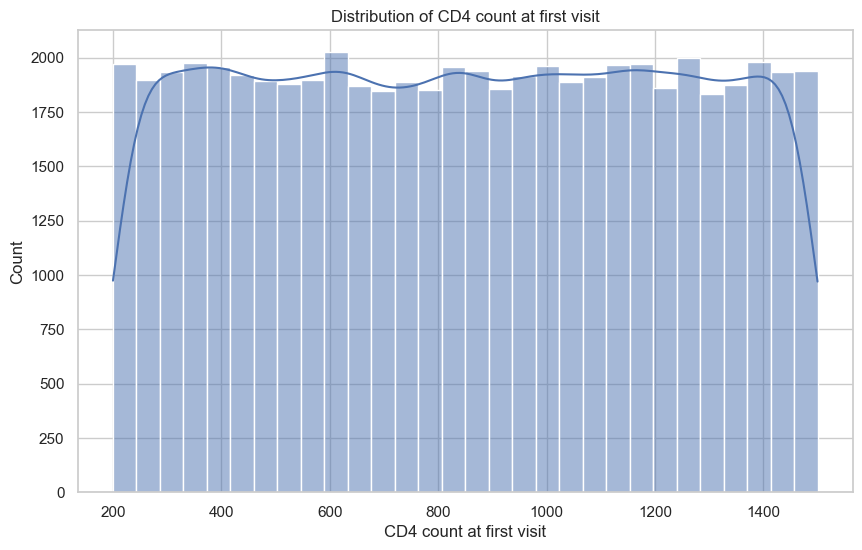

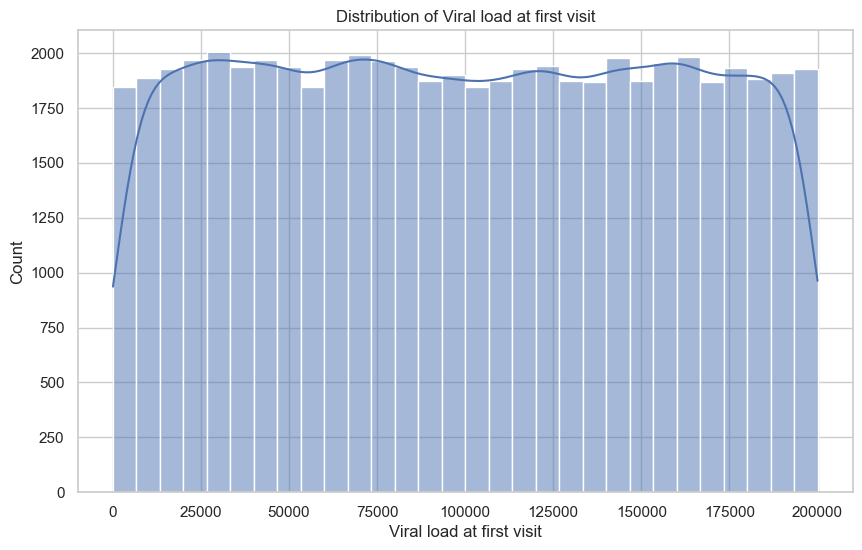

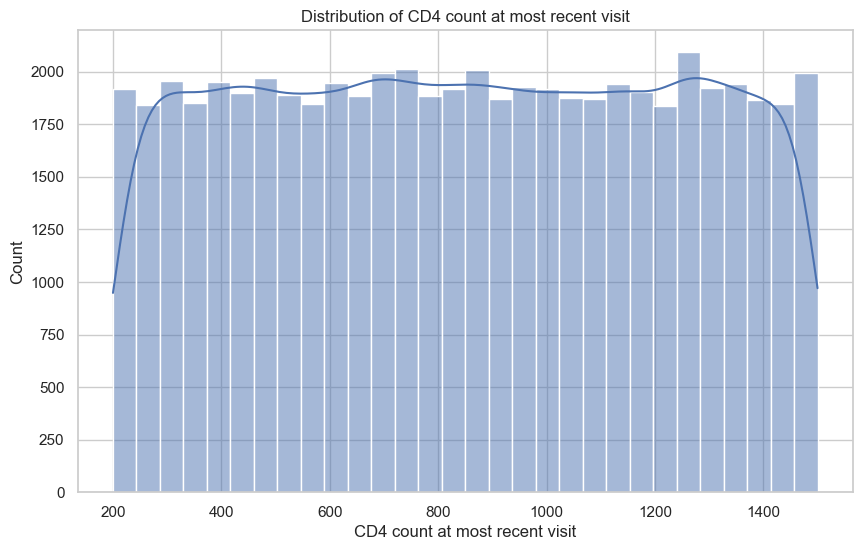

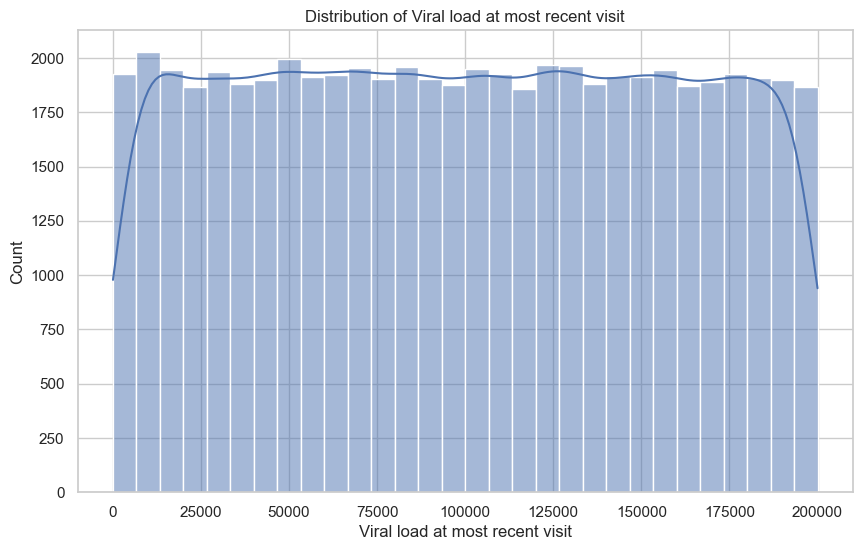

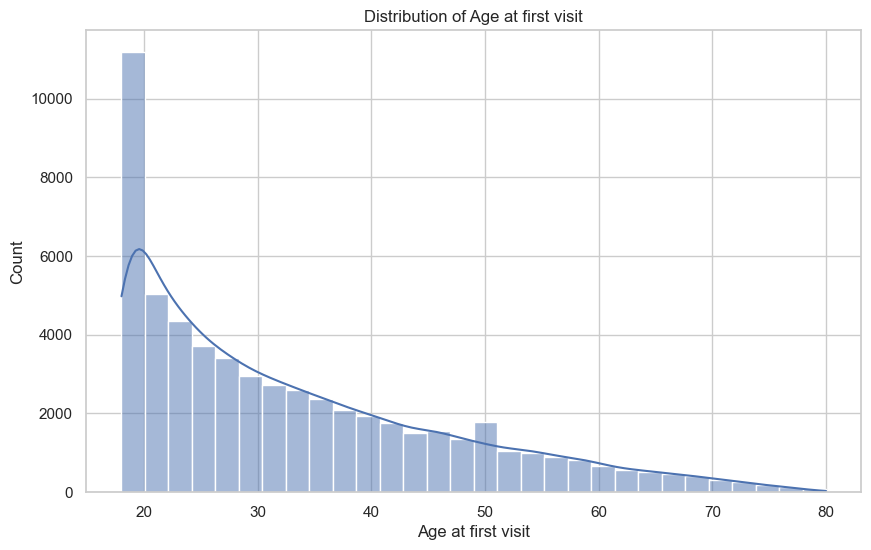

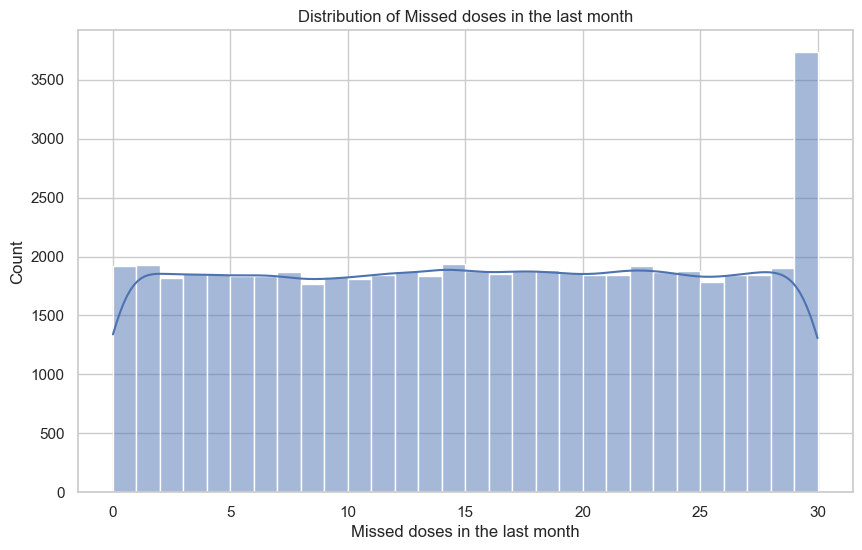

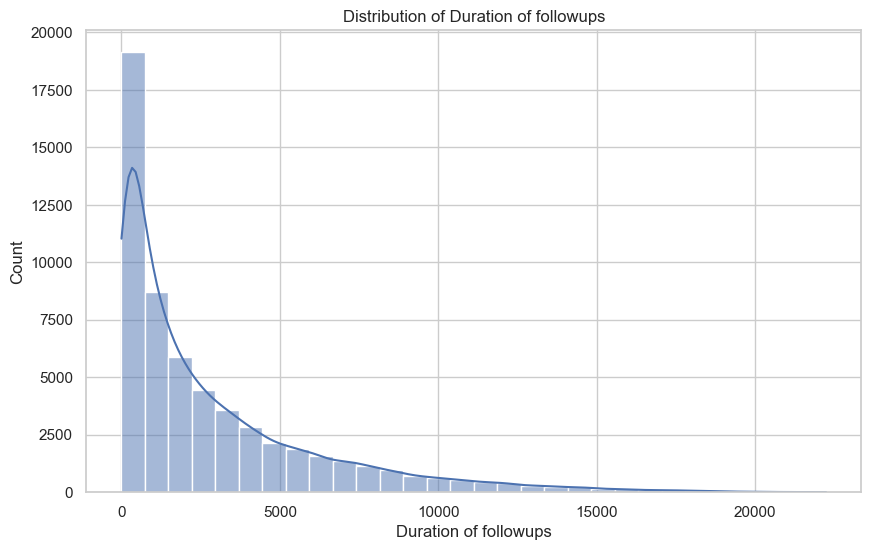

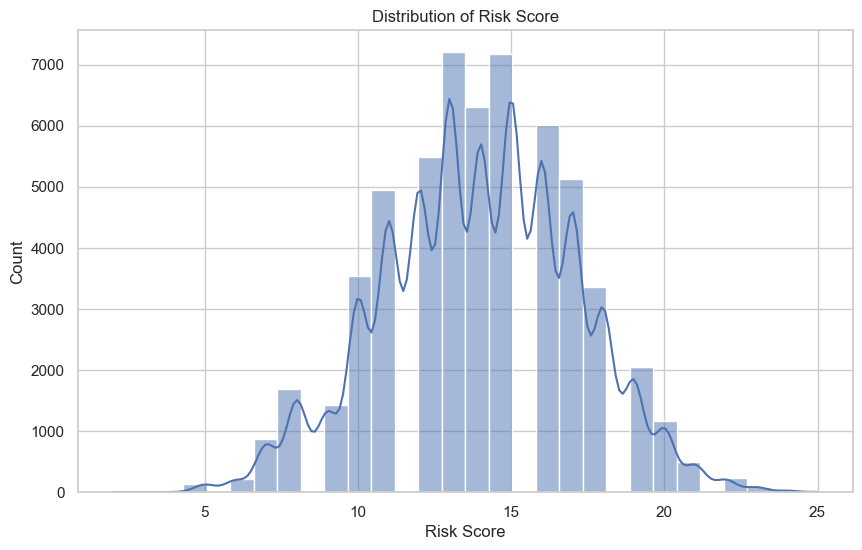

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot distributions of numerical variables
num_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in num_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plot counts of categorical variables
cat_columns = data.select_dtypes(include=['object']).columns
for col in cat_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()

# Visualize relationships between variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age at first visit', y='CD4 count at most recent visit', hue='Gender', data=data)
plt.title('Age at First Visit vs. CD4 Count at Most Recent Visit')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age at first visit', y='Viral load at most recent visit', hue='Gender', data=data)
plt.title('Age at First Visit vs. Viral Load at Most Recent Visit')
plt.show()

In [7]:
data = data.drop(['Patient ID'], axis=1)

In [8]:
data.dtypes

Date of birth                      datetime64[ns]
Gender                                     object
Date confirmed HIV positive        datetime64[ns]
Previous ART exposure                      object
Current ART regimen                        object
Start date of current ART          datetime64[ns]
Date of first visit                datetime64[ns]
Date of most recent visit          datetime64[ns]
CD4 count at first visit                    int64
Viral load at first visit                   int64
CD4 count at most recent visit              int64
Viral load at most recent visit             int64
Age at first visit                          int64
Employment status                          object
Education level                            object
Income level                               object
Marital status                             object
Substance use history                      object
Comorbidities                              object
Reported symptoms                          object


In [9]:
data['DurationToExitDate'] = (pd.to_datetime(data['Date of exit from the study']) - pd.to_datetime(data['Start date of current ART'])).dt.days
data['DurationHIVPositive'] = (pd.to_datetime(data['Date of most recent visit']) - pd.to_datetime(data['Date confirmed HIV positive'])).dt.days

In [10]:
#Drop Date Columns
data = data.drop(['Date of birth', 'Date confirmed HIV positive', 'Start date of current ART', 'Date of first visit', 'Date of most recent visit', 'Date of exit from the study'], axis=1)

In [11]:
# Normalize the Risk Score to a range of 0 to 100
data['Risk Score'] = data['Risk Score'].apply(lambda x: (x - data['Risk Score'].min()) / (data['Risk Score'].max() - data['Risk Score'].min()) * 100)

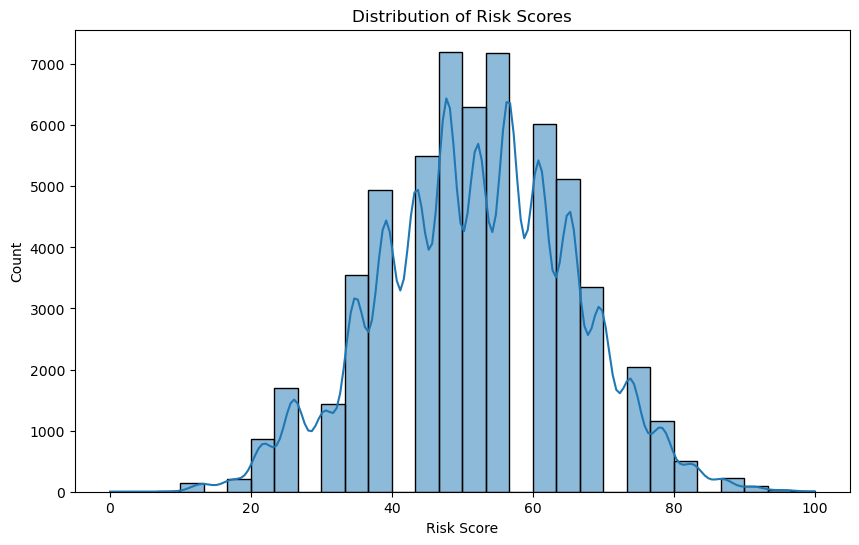

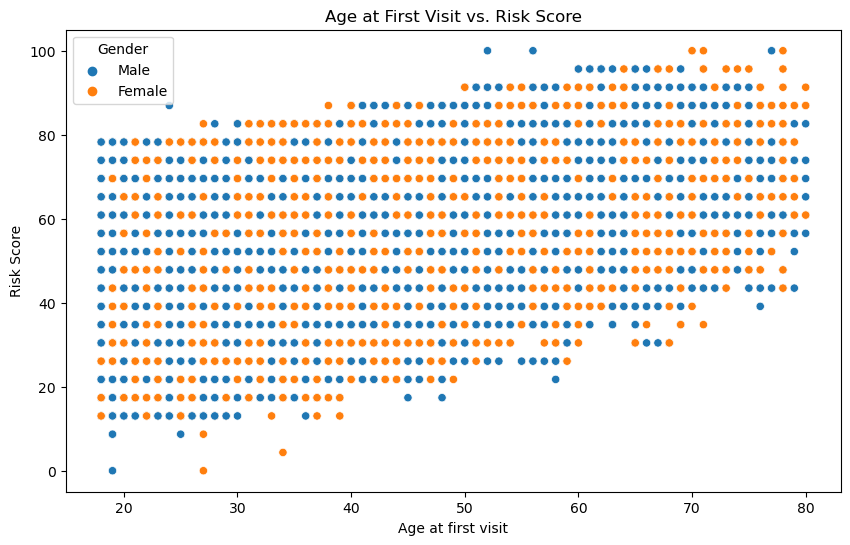

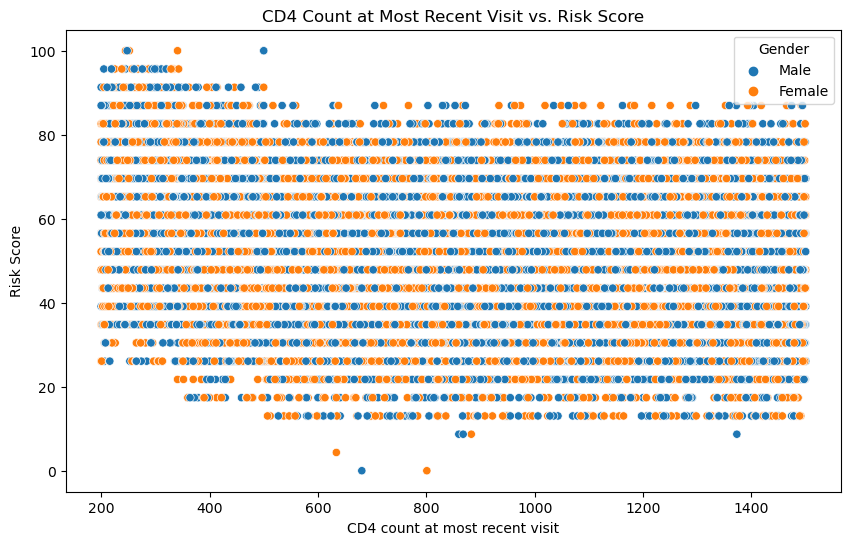

In [12]:
# Distribution of Risk Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Risk Score'], kde=True, bins=30)
plt.title('Distribution of Risk Scores')
plt.show()

# Relationship between Risk Score and Age at First Visit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age at first visit', y='Risk Score', hue='Gender', data=data)
plt.title('Age at First Visit vs. Risk Score')
plt.show()

# Relationship between Risk Score and CD4 count at most recent visit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CD4 count at most recent visit', y='Risk Score', hue='Gender', data=data)
plt.title('CD4 Count at Most Recent Visit vs. Risk Score')
plt.show()

In [13]:
# Define risk category thresholds
low_risk_threshold = 33.33
medium_risk_threshold = 66.67

In [14]:
# Create a new column for risk categories
def categorize_risk(score):
    if score <= low_risk_threshold:
        return 'low risk'
    elif score <= medium_risk_threshold:
        return 'medium risk'
    else:
        return 'high risk'

data['Risk Category'] = data['Risk Score'].apply(categorize_risk)

In [15]:
# Encoding risk categories
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Risk Category Encoded'] = label_encoder.fit_transform(data['Risk Category'])

In [16]:
# Drop rows where the target variable or any critical feature is NaN
data_clean = data.dropna(subset=['Risk Score', 'Risk Category', 'DurationToExitDate', 'Reason for exit'])

# Drop duplicates if any
data_clean = data_clean.drop_duplicates()


In [17]:
# One-hot encoding for categorical features
data_encoded = pd.get_dummies(data_clean, columns=['Gender', 'Marital status', 'Education level', 'Adherence to ART', 'Comorbidities', 'Previous ART exposure', 'Current ART regimen', 'Income level', 'Dietary habits', 'Physical activity', 'Substance use history', 'Reported symptoms', 'Adverse event', 'Employment status'])

In [18]:
data_encoded.head()

,CD4 count at first visit,Viral load at first visit,CD4 count at most recent visit,Viral load at most recent visit,Age at first visit,Missed doses in the last month,Duration of followups,Reason for exit,Risk Score,DurationToExitDate,...,Reported symptoms_Night sweats,Reported symptoms_Other,Reported symptoms_Weight loss,Adverse event_No,Adverse event_Yes,Employment status_Employed,Employment status_Other,Employment status_Retired,Employment status_Student,Employment status_Unemployed
0,372,184642,228,187361,48,30,5461,Other,73.913043,595,...,False,False,False,False,True,False,False,False,True,False
1,1430,166189,852,181030,23,16,693,Died,56.521739,309,...,False,True,False,True,False,False,False,False,False,True
2,1315,65963,1264,6042,42,7,295,Lost to followups,52.173913,761,...,False,False,False,False,True,False,False,True,False,False
3,848,79956,1163,50047,47,24,4425,Transferred out,47.826087,1801,...,False,False,False,True,False,False,True,False,False,False
4,1031,62308,854,143833,19,8,30,Transferred out,65.217391,-25,...,False,True,False,False,True,False,False,False,True,False


In [19]:
data_encoded = data_encoded.drop(columns=['Reason for exit'])

In [20]:
data_encoded = data_encoded.drop(columns=['Risk Category'])

In [21]:
# Check for remaining missing values
missing_values = data_encoded.isnull().sum()
print(missing_values[missing_values > 0])

# If there are still missing values, fill them with an appropriate value
data_encoded = data_encoded.fillna(data_encoded.median())

Series([], dtype: int64)


In [22]:
pd.set_option('display.max_rows', None)
print(data_encoded.dtypes)

CD4 count at first visit                   int64
Viral load at first visit                  int64
CD4 count at most recent visit             int64
Viral load at most recent visit            int64
Age at first visit                         int64
Missed doses in the last month             int64
Duration of followups                      int64
Risk Score                               float64
DurationToExitDate                         int64
DurationHIVPositive                        int64
Risk Category Encoded                      int64
Gender_Female                               bool
Gender_Male                                 bool
Marital status_Divorced                     bool
Marital status_Married                      bool
Marital status_Other                        bool
Marital status_Single                       bool
Marital status_Widowed                      bool
Education level_Other                       bool
Education level_Primary education           bool
Education level_Seco

In [23]:
data_encoded['Gender_Female'] = data_encoded['Gender_Female'].astype(float)

In [24]:
data_encoded['Gender_Male'] = data_encoded['Gender_Male'].astype(float)

In [25]:
data_encoded['Marital status_Divorced'] = data_encoded['Marital status_Divorced'].astype(int)

In [26]:
data_encoded['Marital status_Married'] = data_encoded['Marital status_Married'].astype(int)

In [27]:
data_encoded['Marital status_Other'] = data_encoded['Marital status_Other'].astype(int)

In [28]:
data_encoded['Marital status_Single'] = data_encoded['Marital status_Single'].astype(int)

In [29]:
data_encoded['Marital status_Widowed'] = data_encoded['Marital status_Widowed'].astype(int)

In [30]:
data_encoded['Education level_Other'] = data_encoded['Education level_Other'].astype(int)

In [31]:
data_encoded['Education level_Primary education'] = data_encoded['Education level_Primary education'].astype(int)

In [32]:
data_encoded['Education level_Secondary education'] = data_encoded['Education level_Secondary education'].astype(int)

In [33]:
data_encoded['Education level_Tertiary education'] = data_encoded['Education level_Tertiary education'].astype(int)

In [34]:
data_encoded['Adherence to ART_Always'] = data_encoded['Adherence to ART_Always'].astype(int)

In [35]:
data_encoded['Adherence to ART_Never'] = data_encoded['Adherence to ART_Never'].astype(int)

In [36]:
data_encoded['Adherence to ART_Often'] = data_encoded['Adherence to ART_Often'].astype(int)

In [37]:
data_encoded['Adherence to ART_Rarely'] = data_encoded['Adherence to ART_Rarely'].astype(int)

In [38]:
data_encoded['Adherence to ART_Sometimes'] = data_encoded['Adherence to ART_Sometimes'].astype(int)

In [39]:
data_encoded['Comorbidities_Cardiovascular diseases'] = data_encoded['Comorbidities_Cardiovascular diseases'].astype(int)

In [40]:
data_encoded['Comorbidities_Diabetes'] = data_encoded['Comorbidities_Diabetes'].astype(int)

In [41]:
data_encoded['Comorbidities_Hepatitis B/C'] = data_encoded['Comorbidities_Hepatitis B/C'].astype(int)

In [42]:
data_encoded['Comorbidities_Hypertension'] = data_encoded['Comorbidities_Hypertension'].astype(int)

In [43]:
data_encoded['Comorbidities_None'] = data_encoded['Comorbidities_None'].astype(int)

In [44]:
data_encoded['Comorbidities_Other'] = data_encoded['Comorbidities_Other'].astype(int)

In [45]:
data_encoded['Comorbidities_Tuberculosis'] = data_encoded['Comorbidities_Tuberculosis'].astype(int)

In [46]:
data_encoded['Comorbidities_Diabetes'] = data_encoded['Comorbidities_Diabetes'].astype(int)

In [47]:
data_encoded['Previous ART exposure_No'] = data_encoded['Previous ART exposure_No'].astype(int)

In [48]:
data_encoded['Previous ART exposure_Yes'] = data_encoded['Previous ART exposure_Yes'].astype(int)

In [49]:
data_encoded['Current ART regimen_Regimen A'] = data_encoded['Current ART regimen_Regimen A'].astype(int)

In [50]:
data_encoded['Current ART regimen_Regimen B'] = data_encoded['Current ART regimen_Regimen B'].astype(int)

In [51]:
data_encoded['Current ART regimen_Regimen C'] = data_encoded['Current ART regimen_Regimen C'].astype(int)

In [52]:
data_encoded['Income level_High'] = data_encoded['Income level_High'].astype(int)

In [53]:
data_encoded['Income level_Low'] = data_encoded['Income level_Low'].astype(int)

In [54]:
data_encoded['Income level_Medium'] = data_encoded['Income level_Medium'].astype(int)

In [55]:
data_encoded['Income level_Prefer not to say'] = data_encoded['Income level_Prefer not to say'].astype(int)

In [56]:
data_encoded['Dietary habits_Average'] = data_encoded['Dietary habits_Average'].astype(int)

In [57]:
data_encoded['Dietary habits_Healthy'] = data_encoded['Dietary habits_Healthy'].astype(int)

In [58]:
data_encoded['Dietary habits_Poor'] = data_encoded['Dietary habits_Poor'].astype(int)

In [59]:
data_encoded['Physical activity_Occasional'] = data_encoded['Physical activity_Occasional'].astype(int)

In [60]:
data_encoded['Physical activity_Regular'] = data_encoded['Physical activity_Regular'].astype(int)

In [61]:
data_encoded['Substance use history_Alcohol'] = data_encoded['Substance use history_Alcohol'].astype(int)

In [62]:
data_encoded['Substance use history_Illicit drugs'] = data_encoded['Substance use history_Illicit drugs'].astype(int)

In [63]:
data_encoded['Substance use history_Other'] = data_encoded['Substance use history_Other'].astype(int)

In [64]:
data_encoded['Substance use history_Tobacco'] = data_encoded['Substance use history_Tobacco'].astype(int)

In [65]:
data_encoded['Reported symptoms_Cough'] = data_encoded['Reported symptoms_Cough'].astype(int)

In [66]:
data_encoded['Reported symptoms_Fever'] = data_encoded['Reported symptoms_Fever'].astype(int)

In [67]:
data_encoded['Reported symptoms_Night sweats'] = data_encoded['Reported symptoms_Night sweats'].astype(int)

In [68]:
data_encoded['Reported symptoms_Other'] = data_encoded['Reported symptoms_Other'].astype(int)

In [69]:
data_encoded['Reported symptoms_Weight loss'] = data_encoded['Reported symptoms_Weight loss'].astype(int)

In [70]:
data_encoded['Adverse event_No'] = data_encoded['Adverse event_No'].astype(int)

In [71]:
data_encoded['Adverse event_Yes'] = data_encoded['Adverse event_Yes'].astype(int)

In [72]:
data_encoded['Employment status_Employed'] = data_encoded['Employment status_Employed'].astype(int)

In [73]:
data_encoded['Employment status_Other'] = data_encoded['Employment status_Other'].astype(int)

In [74]:
data_encoded['Employment status_Retired'] = data_encoded['Employment status_Retired'].astype(int)

In [75]:
data_encoded['Employment status_Student'] = data_encoded['Employment status_Student'].astype(int)

data_encoded['Employment status_Unemployed'] = data_encoded['Employment status_Unemployed'].astype(int)

In [76]:
from sklearn.model_selection import train_test_split

# Features and target variable for classification
X = data_encoded.drop(columns=['Risk Score', 'Risk Category Encoded'])  # Exclude target and non-feature columns
y = data_encoded['Risk Category Encoded']

# Split into train and test sets
X_train, X_test, y_train_classification, y_test_classification = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
pd.set_option('display.max_rows', None)
print(X_test.dtypes)

CD4 count at first visit                   int64
Viral load at first visit                  int64
CD4 count at most recent visit             int64
Viral load at most recent visit            int64
Age at first visit                         int64
Missed doses in the last month             int64
Duration of followups                      int64
DurationToExitDate                         int64
DurationHIVPositive                        int64
Gender_Female                            float64
Gender_Male                              float64
Marital status_Divorced                    int64
Marital status_Married                     int64
Marital status_Other                       int64
Marital status_Single                      int64
Marital status_Widowed                     int64
Education level_Other                      int64
Education level_Primary education          int64
Education level_Secondary education        int64
Education level_Tertiary education         int64
Adherence to ART_Alw

In [78]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_classification)

# Check class distribution after resampling
print("Class distribution after resampling:", y_train_resampled.value_counts())

Class distribution after resampling: Risk Category Encoded
2    36585
1    36585
0    36585
Name: count, dtype: int64


In [79]:
#Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classifier Classification Report\n:", classification_report(y_test_classification, y_pred_rf))

KeyboardInterrupt: 

In [ ]:
rf.score(X_test, y_test_classification)

In [80]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [81]:
#Train logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Classification Report\n:", classification_report(y_test_classification, y_pred_lr))

Logistic Regression Classification Report
:               precision    recall  f1-score   support

           0       0.24      0.63      0.34      1426
           1       0.09      0.60      0.16       871
           2       0.82      0.19      0.31      9222

    accuracy                           0.28     11519
   macro avg       0.38      0.47      0.27     11519
weighted avg       0.70      0.28      0.30     11519



/Users/naomiamadi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [82]:
lr.score(X_test, y_test_classification)

0.2771942008854935

In [83]:
#Train Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classifier Classification Report\n:", classification_report(y_test_classification, y_pred_dt))

Decision Tree Classifier Classification Report
:               precision    recall  f1-score   support

           0       0.79      0.89      0.83      1426
           1       0.94      0.96      0.95       871
           2       0.98      0.96      0.97      9222

    accuracy                           0.95     11519
   macro avg       0.90      0.94      0.92     11519
weighted avg       0.95      0.95      0.95     11519



In [84]:
dt.score(X_test, y_test_classification)

0.9494747807969441

In [85]:
#Train Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Classifier Classification Report\n:", classification_report(y_test_classification, y_pred_gb))

Gradient Boosting Classifier Classification Report
:               precision    recall  f1-score   support

           0       0.80      0.87      0.83      1426
           1       0.97      0.92      0.95       871
           2       0.97      0.96      0.97      9222

    accuracy                           0.95     11519
   macro avg       0.91      0.92      0.92     11519
weighted avg       0.95      0.95      0.95     11519



In [86]:
gb.score(X_test, y_test_classification)

0.9486066498828023

In [80]:
#Train XGBoost Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Classifier Classification Report\n:", classification_report(y_test_classification, y_pred_xgb))

XGBoost Classifier Classification Report
:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1426
           1       1.00      0.99      0.99       871
           2       1.00      1.00      1.00      9222

    accuracy                           1.00     11519
   macro avg       1.00      0.99      0.99     11519
weighted avg       1.00      1.00      1.00     11519



In [81]:
xgb.score(X_test, y_test_classification)

0.9961802239777758

In [82]:
data.head()

,Gender,Previous ART exposure,Current ART regimen,CD4 count at first visit,Viral load at first visit,CD4 count at most recent visit,Viral load at most recent visit,Age at first visit,Employment status,Education level,...,Adherence to ART,Missed doses in the last month,Adverse event,Duration of followups,Reason for exit,Risk Score,DurationToExitDate,DurationHIVPositive,Risk Category,Risk Category Encoded
0,Male,No,Regimen C,372,184642,228,187361,48,Student,Other,...,Rarely,30,Yes,5461,Other,73.913043,595,-298,high risk,0
1,Female,Yes,Regimen A,1430,166189,852,181030,23,Unemployed,Secondary education,...,Sometimes,16,No,693,Died,56.521739,309,903,medium risk,2
2,Male,No,Regimen C,1315,65963,1264,6042,42,Retired,Other,...,Always,7,Yes,295,Lost to followups,52.173913,761,5500,medium risk,2
3,Male,Yes,Regimen A,848,79956,1163,50047,47,Other,Primary education,...,Often,24,No,4425,Transferred out,47.826087,1801,3480,medium risk,2
4,Male,No,Regimen C,1031,62308,854,143833,19,Student,Tertiary education,...,Never,8,Yes,30,Transferred out,65.217391,-25,405,medium risk,2


In [ ]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

explainer = ClassifierExplainer(xgb, X_test, y_test_classification, 
                                labels=['high risk', 'medium risk','low risk'] 
                                #idxs = test_names, # defaults to X.index
                                #index_name = "Patient", # defaults to X.index.name
                                #target = "Risk Category Encoded", # defaults to y.name
                                )
ExplainerDashboard(explainer).run(port = 8055)


Detected XGBClassifier model: Changing class type to XGBClassifierExplainer...
model_output=='probability' does not work with multiclass XGBClassifier models, so settings model_output='logodds'...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculati

 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8055
 * Running on http://192.168.1.115:8055
Press CTRL+C to quit
127.0.0.1 - - [05/Jun/2024 17:12:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2024 17:12:37] "GET /assets/bootstrap.min.css?m=1716914202.3686392 HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2024 17:12:37] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_6_2m1717062423.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2024 17:12:37] "GET /_dash-component-suites/dash/deps/react@16.v2_6_2m1717062423.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2024 17:12:37] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_6_2m1717062423.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2024 17:12:37] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_6_2m1717062423.8.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2024 17:12:37] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v1_6_0m1716914202.min.js HTTP/1.1" 2

127.0.0.1 - - [05/Jun/2024 17:12:38] "POST /_dash-update-component HTTP/1.1" 204 -
127.0.0.1 - - [05/Jun/2024 17:12:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2024 17:12:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2024 17:12:38] "POST /_dash-update-component HTTP/1.1" 204 -
127.0.0.1 - - [05/Jun/2024 17:12:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2024 17:12:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2024 17:12:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2024 17:12:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2024 17:12:38] "POST /_dash-update-component HTTP/1.1" 204 -
127.0.0.1 - - [05/Jun/2024 17:12:38] "POST /_dash-update-component HTTP/1.1" 204 -
127.0.0.1 - - [05/Jun/2024 17:12:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2024 17:12:38] "POST /_dash-update-component HTTP/1.1" 200 -
127.

In [97]:
db = ExplainerDashboard(explainer)
explainer.dump("explainer.joblib")


Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating dependencies...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


In [ ]:
# Create separate event indicators for each type of event
data['Event_Died'] = data['Reason for exit'].apply(lambda x: 1 if x == 'Died' else 0)
data['Event_Lost_to_followups'] = data['Reason for exit'].apply(lambda x: 1 if x == 'Lost to followups' else 0)
data['Event_Transferred_out'] = data['Reason for exit'].apply(lambda x: 1 if x == 'Transferred out' else 0)
data['Event_Other'] = data['Reason for exit'].apply(lambda x: 1 if x == 'Other' else 0)


In [ ]:
# Create a multi-state event indicator
def event_indicator(row):
    if row['Event_Died'] == 1:
        return 1
    elif row['Event_Lost_to_followups'] == 1:
        return 2
    elif row['Event_Transferred_out'] == 1:
        return 3
    elif row['Event_Other'] == 1:
        return 4
    else:
        return 0

data['Event'] = data.apply(event_indicator, axis=1)


In [ ]:
data = pd.get_dummies(data, drop_first=True)


In [ ]:
# Define features (covariates)
X_survival = data.drop(columns=[ 'DurationToExitDate', 'Event_Died', 'Event_Lost_to_followups', 'Event_Transferred_out', 'Event_Other'])

# Define target variables for survival analysis
duration = data['DurationToExitDate']
event = data['Event']

# Verify the prepared data
print(X_survival.head())
print(duration.head())
print(event.head())

In [ ]:
X_survival.info()

In [ ]:
from lifelines import CoxPHFitter

# Combine features and target variables into one DataFrame for lifelines
survival_data = X_survival.copy()
survival_data['Duration'] = duration
survival_data['Event'] = (event == 1).astype(int)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = survival_data.corr()

In [ ]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [116]:
# Identify features with high correlation (absolute value > 0.9)
high_corr_pairs = np.where(np.abs(correlation_matrix) > 0.9)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

In [117]:
# Drop one of each pair of highly correlated features
features_to_drop = set()
for pair in high_corr_pairs:
    features_to_drop.add(pair[1])

In [118]:
# Drop highly correlated features
survival_data_reduced = survival_data.drop(columns=list(features_to_drop))

In [119]:
survival_data_reduced = survival_data_reduced[survival_data_reduced['Duration'] > 0]

In [120]:
# Train Cox Proportional Hazards model with reduced data
cph = CoxPHFitter()
cph.fit(survival_data_reduced, duration_col='Duration', event_col='Event')
cph.print_summary()


/Users/naomiamadi/anaconda3/lib/python3.11/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning:

Column Reason for exit_Lost to followups have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['Event'].astype(bool)
>>> print(df.loc[events, 'Reason for exit_Lost to followups'].var())
>>> print(df.loc[~events, 'Reason for exit_Lost to followups'].var())

A very low variance means that the column Reason for exit_Lost to followups completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.


/Users/naomiamadi/anaconda3/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1607: ConvergenceWarning:

Newton-Raphson convergence completed successfully but norm(delta) is still high, 0.749. This may imply non-unique solutions t

<lifelines.CoxPHFitter: fitted with 28891 total observations, 21563 right-censored observations>
             duration col = 'Duration'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 28891
number of events observed = 7328
   partial log-likelihood = -56242.06
         time fit was run = 2024-05-30 17:42:22 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
CD4 count at first visit              0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Viral load at first visit            -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
CD4 count at most recent visit        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Viral load at most recent visit      -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Age at first visit                   -0.02       0.98       0.00            -0.02            -0.01                 0.98                 0.99
Missed doses in the last month       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Duration of followups                -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
Risk Score                            0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
DurationHIVPositive                  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
Risk Category Encoded                -0.01       0.99       0.02            -0.05             0.04                 0.95                 1.04
Gender_Male                          -0.04       0.97       0.02            -0.08             0.01                 0.92                 1.01
Previous ART exposure_Yes             0.03       1.03       0.02            -0.02             0.07                 0.98                 1.08
Current ART regimen_Regimen B         0.06       1.06       0.03             0.00             0.11                 1.00                 1.12
Current ART regimen_Regimen C         0.02       1.02       0.03            -0.03             0.08                 0.97                 1.08
Employment status_Other               0.00       1.00       0.04            -0.07             0.08                 0.93                 1.08
Employment status_Retired            -0.01       0.99       0.04            -0.08             0.07                 0.92                 1.07
Employment status_Student             0.01       1.01       0.04            -0.07             0.08                 0.93                 1.08
Employment status_Unemployed         -0.07       0.94       0.04            -0.14             0.01                 0.87                 1.01
Education level_Primary education    -0.04       0.96       0.03            -0.11             0.02                 0.90                 1.02
Education level_Secondary education   0.01       1.01       0.03            -0.05             0.08                 0.95                 1.08
Education level_Tertiary education   -0.03       0.97       0.03            -0.09             0.04                 0.91                 1.04
Income level_Low                      0.03       1.03       0.03            -0.04             0.09                 0.96                 1.10
Income level_Medium                  -0.02       0.98       0.03            -0.09             0.04                 0.92                 1.04
Income level_Prefer not to say       -0.01       0.99       0.03            -0.08             0.05       

In [121]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(survival_data.drop(columns=['Duration', 'Event']))

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame for PCA components
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)
pca_df['Duration'] = survival_data['Duration'].values
pca_df['Event'] = survival_data['Event'].values

In [122]:
# Train Cox Proportional Hazards model with PCA data
cph_pca = CoxPHFitter()
cph_pca.fit(pca_df, duration_col='Duration', event_col='Event')
cph_pca.print_summary()

<lifelines.CoxPHFitter: fitted with 57592 total observations, 43100 right-censored observations>
             duration col = 'Duration'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 57592
number of events observed = 14492
   partial log-likelihood = -141184.55
         time fit was run = 2024-05-30 17:42:40 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
PC1        -0.18       0.83       0.01            -0.19            -0.17                 0.82                 0.84
PC2         0.04       1.04       0.01             0.03             0.05                 1.03                 1.06
PC3        -0.04       0.96       0.01            -0.05            -0.02                 0.95                 0.98
PC4        -0.03       0.97       0.01            -0.05            -0.02                 0.95                 0.98
PC5        -0.42       0.66       0.01            -0.43            -0.40                 0.65                 0.67
PC6        -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01
PC7         0.01       1.01       0.01            -0.01             0.02                 0.99                 1.02
PC8        -0.02       0.98       0.01            -0.04            -0.01                 0.96                 0.99
PC9         0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
PC10       -0.02       0.98       0.01            -0.03            -0.00                 0.97                 1.00
PC11       -0.02       0.98       0.01            -0.03            -0.00                 0.97                 1.00
PC12       -0.02       0.98       0.01            -0.03            -0.00                 0.97                 1.00
PC13       -0.00       1.00       0.01            -0.02             0.01                 0.98                 1.01
PC14        0.01       1.01       0.01            -0.01             0.02                 0.99                 1.02
PC15       -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
PC16        0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
PC17        0.02       1.02       0.01             0.00             0.03                 1.00                 1.03
PC18        0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
PC19        0.01       1.01       0.01            -0.01             0.02                 0.99                 1.02
PC20       -0.02       0.98       0.01            -0.03            -0.00                 0.97                 1.00
PC21        0.05       1.06       0.01             0.04             0.07                 1.04                 1.07
PC22        0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
PC23        0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03
PC24        0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03
PC25        0.01       1.01       0.01            -0.01             0.02                 0.99                 1.02
PC26        0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03
PC27        0.01       1.01       0.01            -0.01             0.02                 0.99                 1.02
PC28       -0.00       1.00       0.01            -0.02             0.01                 0.98                 1.01
PC29       -0.04       0.96       0.01            -0.06            -0.03                 0.95                 0.97
PC30        0.11       1.11       0.01             0.09        

In [123]:
# Train penalized Cox Proportional Hazards model with L2 regularization
cph_ridge = CoxPHFitter(penalizer=0.1)
cph_ridge.fit(survival_data_reduced, duration_col='Duration', event_col='Event')
cph_ridge.print_summary()

<lifelines.CoxPHFitter: fitted with 28891 total observations, 21563 right-censored observations>
             duration col = 'Duration'
                event col = 'Event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 28891
number of events observed = 7328
   partial log-likelihood = -62069.07
         time fit was run = 2024-05-30 17:42:45 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
CD4 count at first visit              0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Viral load at first visit            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
CD4 count at most recent visit       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Viral load at most recent visit      -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Age at first visit                   -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
Missed doses in the last month       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Duration of followups                -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
Risk Score                           -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
DurationHIVPositive                  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
Risk Category Encoded                 0.02       1.02       0.02            -0.01             0.05                 0.99                 1.05
Gender_Male                          -0.00       1.00       0.02            -0.04             0.03                 0.96                 1.03
Previous ART exposure_Yes            -0.00       1.00       0.02            -0.04             0.04                 0.96                 1.04
Current ART regimen_Regimen B         0.03       1.03       0.02            -0.01             0.08                 0.99                 1.08
Current ART regimen_Regimen C         0.02       1.02       0.02            -0.03             0.06                 0.98                 1.07
Employment status_Other              -0.00       1.00       0.03            -0.06             0.05                 0.95                 1.05
Employment status_Retired             0.02       1.02       0.03            -0.04             0.07                 0.97                 1.07
Employment status_Student             0.00       1.00       0.03            -0.05             0.05                 0.95                 1.06
Employment status_Unemployed         -0.02       0.98       0.03            -0.07             0.03                 0.93                 1.03
Education level_Primary education    -0.02       0.99       0.02            -0.06             0.03                 0.94                 1.03
Education level_Secondary education   0.01       1.01       0.02            -0.03             0.06                 0.97                 1.07
Education level_Tertiary education   -0.00       1.00       0.02            -0.05             0.04                 0.95                 1.04
Income level_Low                      0.00       1.00       0.02            -0.05             0.05                 0.96                 1.05
Income level_Medium                  -0.01       0.99       0.02            -0.06             0.04                 0.94                 1.04
Income level_Prefer not to say       -0.0

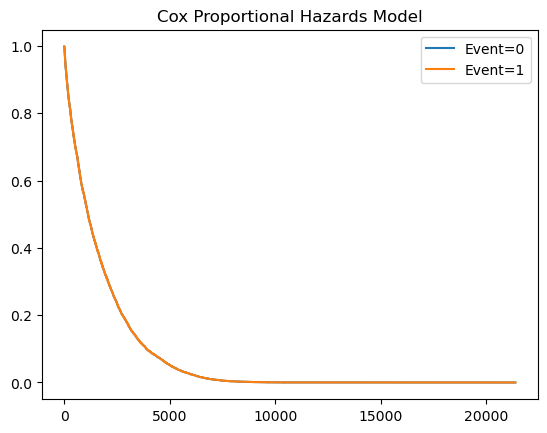

In [124]:
# Plot the survival function for different covariates
cph.plot_partial_effects_on_outcome(covariates=['Event'], values=[0, 1], plot_baseline=False)
plt.title('Cox Proportional Hazards Model')
plt.show()

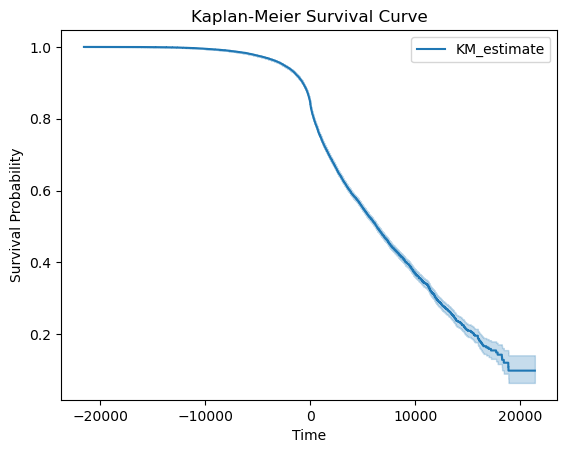

In [125]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(durations=survival_data['Duration'], event_observed=survival_data['Event'])

# Plot the survival function
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

In [128]:
#Convert bool into numeric
survival_data_reduced = survival_data_reduced.replace({True: 1, False: 0})


              Weibull_estimate
1.000000              0.999628
43.875752             0.991354
86.751503             0.984795
129.627255            0.978819
172.503006            0.973203
215.378758            0.967849
258.254509            0.962700
301.130261            0.957718
344.006012            0.952878
386.881764            0.948162
429.757515            0.943556
472.633267            0.939048
515.509018            0.934628
558.384770            0.930291
601.260521            0.926028
644.136273            0.921835
687.012024            0.917707
729.887776            0.913640
772.763527            0.909630
815.639279            0.905675
858.515030            0.901771
901.390782            0.897917
944.266533            0.894109
987.142285            0.890346
1030.018036           0.886626
1072.893788           0.882947
1115.769539           0.879308
1158.645291           0.875707
1201.521042           0.872142
1244.396794           0.868614
1287.272545           0.865119
1330.148

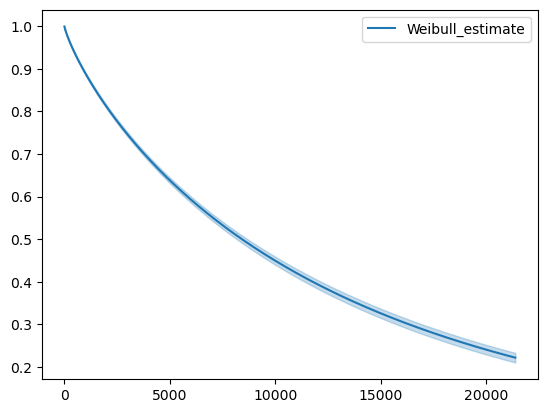

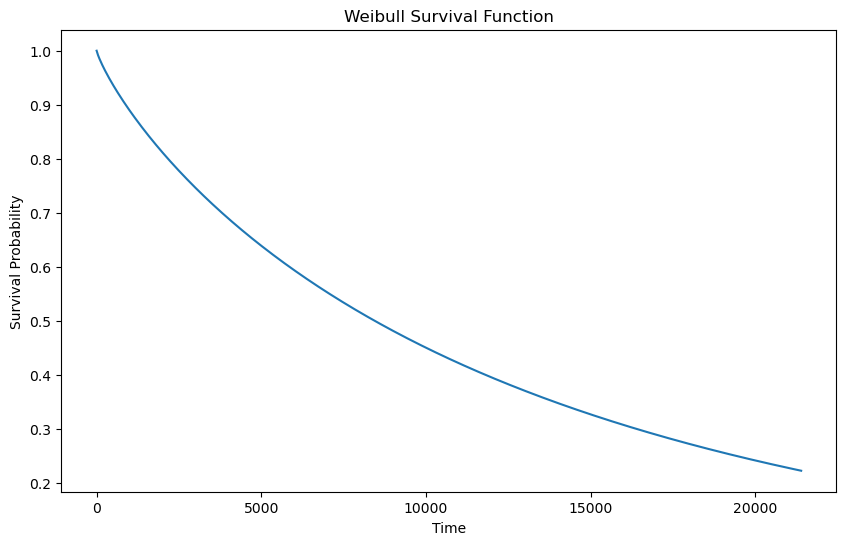

In [129]:
from lifelines import WeibullFitter

wf = WeibullFitter()

# Ensure the same DataFrame is used for both durations and events
wf.fit(durations=survival_data_reduced['Duration'], event_observed=survival_data_reduced['Event'])

# Plot the survival function
wf.plot_survival_function()

# Alternatively, you can access the survival function directly
survival_function = wf.survival_function_
print(survival_function)

# Plot the survival function
plt.figure(figsize=(10, 6))
plt.plot(survival_function)
plt.title('Weibull Survival Function')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

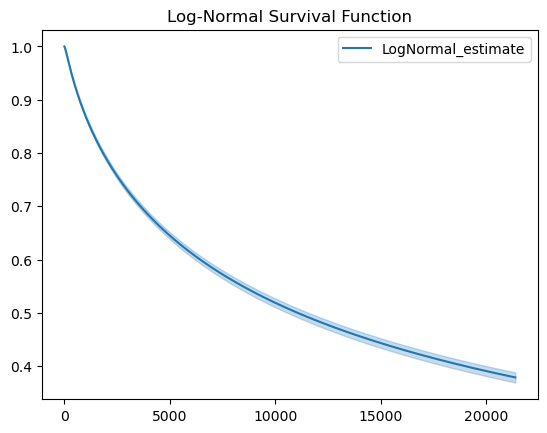

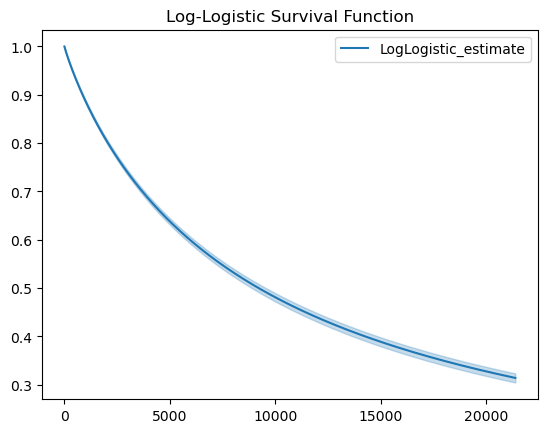

In [130]:
from lifelines import LogNormalFitter, LogLogisticFitter

# Log-Normal model
lnf = LogNormalFitter()
lnf.fit(durations=survival_data_reduced['Duration'], event_observed=survival_data_reduced['Event'])
lnf.plot_survival_function()
plt.title('Log-Normal Survival Function')
plt.show()

# Log-Logistic model
llf = LogLogisticFitter()
llf.fit(durations=survival_data_reduced['Duration'], event_observed=survival_data_reduced['Event'])
llf.plot_survival_function()
plt.title('Log-Logistic Survival Function')
plt.show()

In [131]:
from lifelines.utils import concordance_index

# Compute C-index for the Cox model
c_index = concordance_index(survival_data_reduced['Duration'], -cph.predict_partial_hazard(survival_data_reduced), survival_data_reduced['Event'])
print(f"C-index for Cox model: {c_index}")

C-index for Cox model: 0.9321809949486257


In [132]:
from lifelines.utils import k_fold_cross_validation
from lifelines import CoxPHFitter

# Perform k-fold cross-validation
cph = CoxPHFitter()
scores = k_fold_cross_validation(cph, survival_data_reduced, duration_col='Duration', event_col='Event', k=5)
print(scores)


/Users/naomiamadi/anaconda3/lib/python3.11/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning:

Column Reason for exit_Lost to followups have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['Event'].astype(bool)
>>> print(df.loc[events, 'Reason for exit_Lost to followups'].var())
>>> print(df.loc[~events, 'Reason for exit_Lost to followups'].var())

A very low variance means that the column Reason for exit_Lost to followups completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.


/Users/naomiamadi/anaconda3/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1607: ConvergenceWarning:

Newton-Raphson convergence completed successfully but norm(delta) is still high, 0.749. This may imply non-unique solutions t

[-1.5403941933965606, -1.5468934898721318, -1.5410316417103354, -1.5416848291053429, -1.5412380434326063]


In [136]:
events = survival_data['Event'].astype(bool)
print(survival_data.loc[events, 'Reason for exit_Lost to followups'].var())
print(survival_data.loc[~events, 'Reason for exit_Lost to followups'].var())

0.0
0.22239983873528324


/Users/naomiamadi/anaconda3/lib/python3.11/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning:

Column Reason for exit_Lost to followups have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['Event'].astype(bool)
>>> print(df.loc[events, 'Reason for exit_Lost to followups'].var())
>>> print(df.loc[~events, 'Reason for exit_Lost to followups'].var())

A very low variance means that the column Reason for exit_Lost to followups completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.


/Users/naomiamadi/anaconda3/lib/python3.11/site-packages/lifelines/fitters/coxph_fitter.py:1607: ConvergenceWarning:

Newton-Raphson convergence completed successfully but norm(delta) is still high, 0.749. This may imply non-unique solutions t

<lifelines.CoxPHFitter: fitted with 28891 total observations, 21563 right-censored observations>
             duration col = 'Duration'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 28891
number of events observed = 7328
   partial log-likelihood = -56242.06
         time fit was run = 2024-05-30 17:43:39 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
CD4 count at first visit              0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Viral load at first visit            -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
CD4 count at most recent visit        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Viral load at most recent visit      -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Age at first visit                   -0.02       0.98       0.00            -0.02            -0.01                 0.98                 0.99
Missed doses in the last month       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Duration of followups                -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
Risk Score                            0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
DurationHIVPositive                  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
Risk Category Encoded                -0.01       0.99       0.02            -0.05             0.04                 0.95                 1.04
Gender_Male                          -0.04       0.97       0.02            -0.08             0.01                 0.92                 1.01
Previous ART exposure_Yes             0.03       1.03       0.02            -0.02             0.07                 0.98                 1.08
Current ART regimen_Regimen B         0.06       1.06       0.03             0.00             0.11                 1.00                 1.12
Current ART regimen_Regimen C         0.02       1.02       0.03            -0.03             0.08                 0.97                 1.08
Employment status_Other               0.00       1.00       0.04            -0.07             0.08                 0.93                 1.08
Employment status_Retired            -0.01       0.99       0.04            -0.08             0.07                 0.92                 1.07
Employment status_Student             0.01       1.01       0.04            -0.07             0.08                 0.93                 1.08
Employment status_Unemployed         -0.07       0.94       0.04            -0.14             0.01                 0.87                 1.01
Education level_Primary education    -0.04       0.96       0.03            -0.11             0.02                 0.90                 1.02
Education level_Secondary education   0.01       1.01       0.03            -0.05             0.08                 0.95                 1.08
Education level_Tertiary education   -0.03       0.97       0.03            -0.09             0.04                 0.91                 1.04
Income level_Low                      0.03       1.03       0.03            -0.04             0.09                 0.96                 1.10
Income level_Medium                  -0.02       0.98       0.03            -0.09             0.04                 0.92                 1.04
Income level_Prefer not to say       -0.01       0.99       0.03            -0.08             0.05       

covariate
CD4 count at first visit               6.135872e-05
Viral load at first visit             -4.419641e-07
CD4 count at most recent visit         1.219054e-05
Viral load at most recent visit       -4.802360e-08
Age at first visit                    -1.587046e-02
Missed doses in the last month        -1.268824e-03
Duration of followups                 -5.602775e-05
Risk Score                             3.196112e-03
DurationHIVPositive                   -1.104807e-04
Risk Category Encoded                 -7.704896e-03
Gender_Male                           -3.528358e-02
Previous ART exposure_Yes              2.866000e-02
Current ART regimen_Regimen B          5.793905e-02
Current ART regimen_Regimen C          2.284702e-02
Employment status_Other                3.035296e-03
Employment status_Retired             -7.185640e-03
Employment status_Student              6.312511e-03
Employment status_Unemployed          -6.699561e-02
Education level_Primary education     -4.101049e-02
Ed

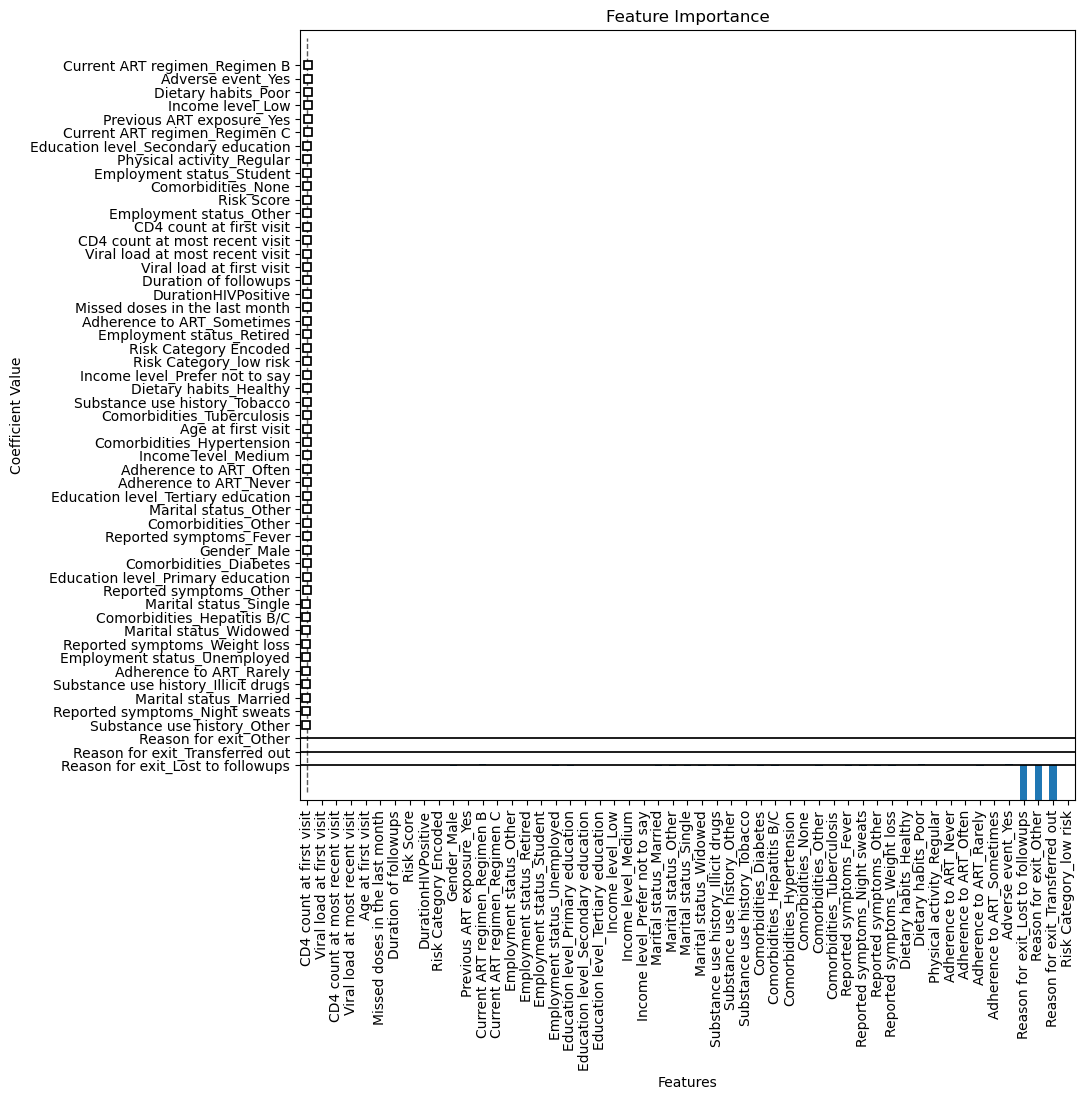

In [133]:
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

# Assuming your CoxPHFitter model is fitted to the survival_data_reduced
cph.fit(survival_data_reduced, duration_col='Duration', event_col='Event')
cph.print_summary()

# Plot the coefficients to see feature importance
cph.plot()

# Alternatively, you can access the coefficients directly
coefficients = cph.params_
print(coefficients)

# Plotting feature importance
coefficients.plot(kind='bar', figsize=(10, 10))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


In [139]:
import types
def predict_proba(self, X):
    pred = self.predict_expectation(X)
    return np.array([1-pred, pred]).T

In [ ]:

#explainer = ClassifierExplainer(cph, 'Duration', 'Event', 
                               #labels=['High Risk', 'Medium Risk', 'Low Risk'])

#ExplainerDashboard(explainer).run()


In [ ]:
#cph.predict_proba = types.MethodType(predict_proba, cph)
#explainer = ClassifierExplainer(cph, X_train_resampled,y_train_resampled,
                               #labels=['Duration','Intervention Plan'])

#ExplainerDashboard(explainer).run(port=8053)


In [157]:
X_train_resampled.columns

Index(['CD4 count at first visit', 'Viral load at first visit',
       'CD4 count at most recent visit', 'Viral load at most recent visit',
       'Age at first visit', 'Missed doses in the last month',
       'Duration of followups', 'DurationToExitDate', 'DurationHIVPositive',
       'Gender_Female', 'Gender_Male', 'Marital status_Divorced',
       'Marital status_Married', 'Marital status_Other',
       'Marital status_Single', 'Marital status_Widowed',
       'Education level_Other', 'Education level_Primary education',
       'Education level_Secondary education',
       'Education level_Tertiary education', 'Adherence to ART_Always',
       'Adherence to ART_Never', 'Adherence to ART_Often',
       'Adherence to ART_Rarely', 'Adherence to ART_Sometimes',
       'Comorbidities_Cardiovascular diseases', 'Comorbidities_Diabetes',
       'Comorbidities_Hepatitis B/C', 'Comorbidities_Hypertension',
       'Comorbidities_None', 'Comorbidities_Other',
       'Comorbidities_Tuberculosis'

In [156]:
X_train_resampled['Risk Score'] = survival_data['Risk Score']